In [138]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA

!pip install mlxtend
from mlxtend.plotting import plot_decision_regions




[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\papv2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [139]:
# # for google colab only
# from google.colab import drive
# drive.mount('/content/drive/')

In [140]:
# load our dataset from csv
df = pd.read_csv('iris_dataset.csv', delimiter=',')

# view sample first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [141]:
# check for null values in our dataset
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [142]:
# take a look at the shape of our dataset

df.shape

(150, 5)

In [143]:
# look at other metrics in the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [144]:
# look at the object types of the columns in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [145]:
encoded_data = df.copy()
encoded_data['species_encoded'] = encoded_data['species'].map({'setosa': 1, 'versicolor': 2, 'virginica': 3})

In [146]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
 5   species_encoded    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [147]:
# we dont need the object species because we encoded it
encoded_data = encoded_data.drop('species', axis=1)


In [148]:
# display our transformed dataset
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_encoded    150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [149]:
# overwrite df with encoded_data
df = encoded_data

In [150]:
# define our features and label

X = df.drop('species_encoded', axis=1)
y = df['species_encoded']

In [151]:
# look at correlation and correlation analysis

df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_encoded
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species_encoded,0.782561,-0.426658,0.949035,0.956547,1.000000


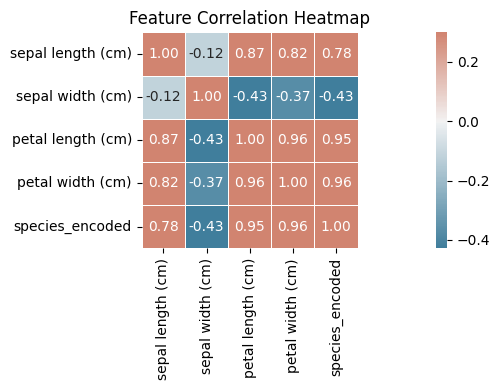

In [152]:
# create a correlation heatmap

plt.figure(figsize=(16, 4))
correlation_matrix = df.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, annot=True, fmt='.2f', cbar={"shrink": .5})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()

In [153]:
df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
species_encoded      0.671141
dtype: float64

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

In [155]:
# select our scaler
scaler = StandardScaler()

# Fit the data on the scaler
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_trained_scaled
X_test = X_test_scaled

In [156]:
# target counts 

target_counts = df['species_encoded'].value_counts()
print(target_counts)

species_encoded
1    50
2    50
3    50
Name: count, dtype: int64


In [157]:
# Define out model
logistic_regression = LogisticRegression(max_iter=1000, random_state=31)

# train the model
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
y_pred_probability = logistic_regression.predict_proba(X_test_scaled)

# look at probability classes (part of the sigmoid function)
print(f"Probability shape: {y_pred_probability}")
print("sample probabilities")
for i in range(min(5, len(y_pred_probability))):
    print(f"instance {i}: {y_pred_probability}")

Probability shape: [[9.68308156e-01 3.16914594e-02 3.84395759e-07]
 [6.27854054e-08 3.21559722e-03 9.96784340e-01]
 [6.97437171e-03 7.51381704e-01 2.41643924e-01]
 [9.73696687e-01 2.63029964e-02 3.17026695e-07]
 [3.80700854e-02 8.78033483e-01 8.38964314e-02]
 [9.93807899e-01 6.19202938e-03 7.18448249e-08]
 [1.65131145e-02 8.89374244e-01 9.41126413e-02]
 [9.71532746e-01 2.84669372e-02 3.16430138e-07]
 [2.90202661e-04 1.51062397e-01 8.48647400e-01]
 [3.98938139e-02 8.18729803e-01 1.41376384e-01]
 [1.13268050e-01 8.56182792e-01 3.05491580e-02]
 [1.64627838e-01 8.26965614e-01 8.40654847e-03]
 [2.70893509e-04 7.11496588e-02 9.28579448e-01]
 [9.51557415e-01 4.84421065e-02 4.78960498e-07]
 [9.84427868e-01 1.55720561e-02 7.55575212e-08]
 [8.59260993e-05 5.29021214e-02 9.47011952e-01]
 [1.04975758e-06 1.79327475e-02 9.82066203e-01]
 [3.35301038e-03 5.83939927e-01 4.12707062e-01]
 [9.79347483e-01 2.06522610e-02 2.56220352e-07]
 [6.14592003e-02 9.27806668e-01 1.07341318e-02]
 [2.77919302e-04 4.90

In [158]:
# create the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Confusion Matrix
 [[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]


In [159]:
# look at output metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1}")

accuracy: 0.9111111111111111
precision: 0.9111111111111111
recall: 0.9111111111111111
f1 score: 0.9111111111111111


In [160]:
# Classification report 
print(f"classification report:\n {classification_report(y_test, y_pred)}")

classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.87      0.87      0.87        15
           3       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



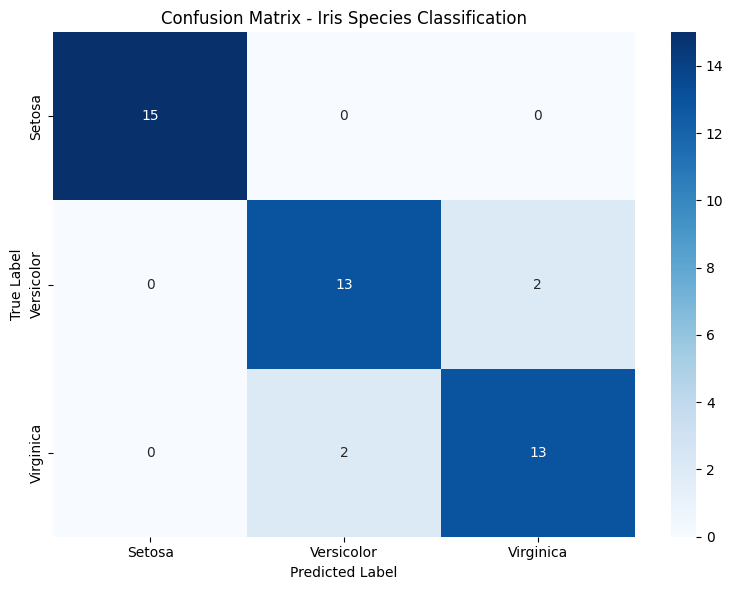

In [161]:
# Create confusion matrix with correct setup
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual species names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Iris Species Classification')
plt.tight_layout()
plt.show()

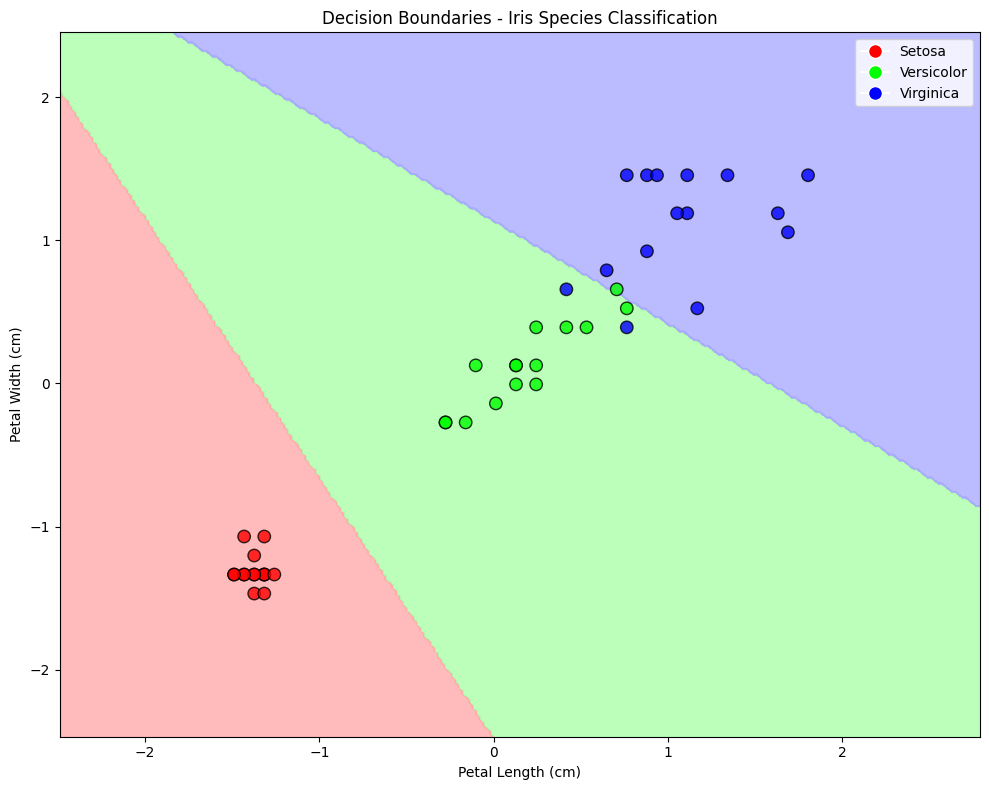

In [162]:
# Plot Graph Labels and show output

# Select the two most discriminative features for visualization
# For Iris, petal length and petal width are typically most informative
feature_idx = [2, 3]  # Petal length and petal width

# Extract these features from your data
X_vis = X_test_scaled[:, feature_idx] if hasattr(X_test, 'values') else X_test_scaled[:, feature_idx]
y_vis = np.array(y_test)

# Create a meshgrid to visualize the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create feature vectors for all meshgrid points
# But we need to fill in the other features with average values
X_full = np.zeros((xx.ravel().shape[0], X_train.shape[1] if hasattr(X_train, 'shape') else X_train.shape[1]))


# Get the mean values for the features we're not visualizing
if hasattr(X_train, 'values'):
    feature_means = X_train.values.mean(axis=0)
else:
    feature_means = X_train.mean(axis=0)

# Fill the array with mean values for non-visualized features
for i in range(X_full.shape[1]):
    if i in feature_idx:
        # For the two features we're visualizing, use the meshgrid values
        idx = feature_idx.index(i)
        X_full[:, i] = np.c_[xx.ravel(), yy.ravel()][:, idx]
    else:
        # For other features, use the mean value
        X_full[:, i] = feature_means[i]

# Predict using the full model
Z = logistic_regression.predict(X_full)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))

# Create a custom colormap for the three Iris classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

# Plot the training points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold, 
           edgecolors='k', s=80, alpha=0.8)

# Get feature names if available
if hasattr(X_test_scaled, 'columns'):
    feature_names = list(X_test.columns)
    plt.xlabel(feature_names[feature_idx[0]])
    plt.ylabel(feature_names[feature_idx[1]])
else:
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')

plt.title('Decision Boundaries - Iris Species Classification')

# Create legend
class_names = ['Setosa', 'Versicolor', 'Virginica']
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, 
                            markersize=10, label=class_names[i]) 
                 for i, c in enumerate(['#FF0000', '#00FF00', '#0000FF'])]
plt.legend(handles=legend_patches, loc='upper right')

plt.tight_layout()
plt.show()

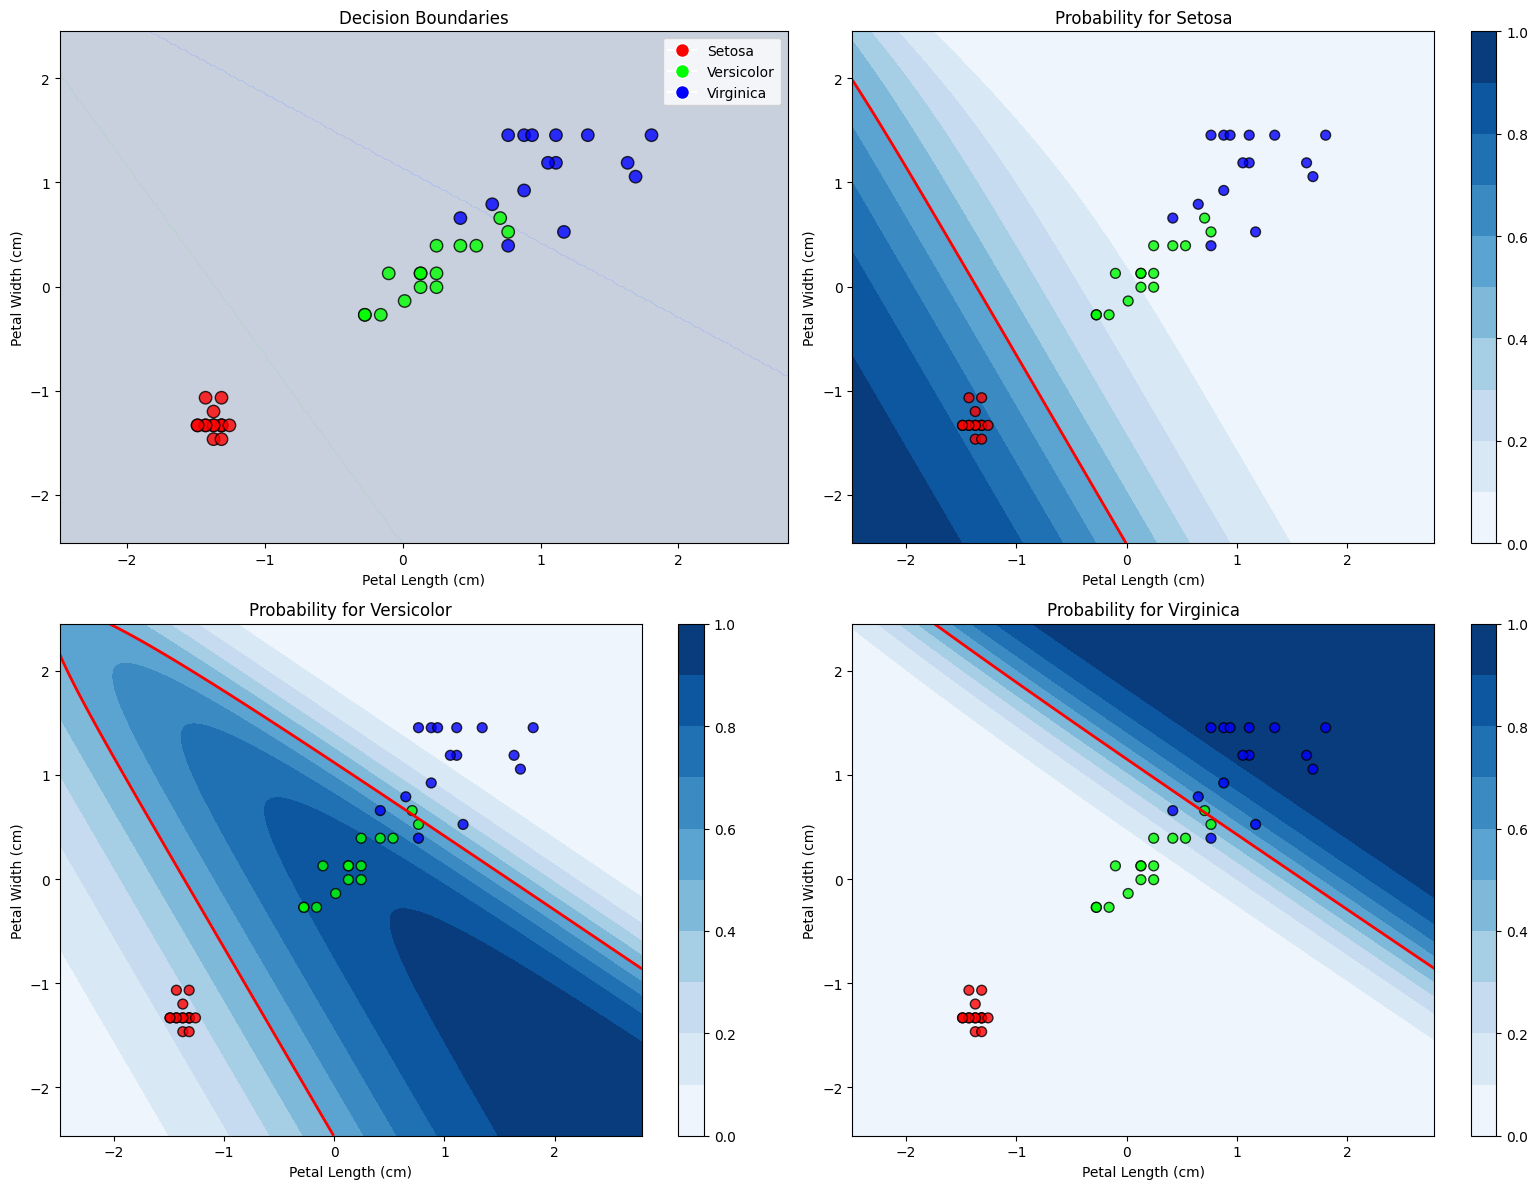

In [163]:
"""Alternatively, show output in Logistic Regression Fashion"""

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# First subplot: Traditional decision boundaries
for class_id in np.unique(Z):
    mask = (Z == class_id)
    axs[0, 0].contourf(xx, yy, mask, alpha=0.4, colors=[cmap_light(class_id-1)])
    
axs[0, 0].scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold,
                edgecolors='k', s=80, alpha=0.8)
axs[0, 0].set_xlabel('Petal Length (cm)')
axs[0, 0].set_ylabel('Petal Width (cm)')
axs[0, 0].set_title('Decision Boundaries')
axs[0, 0].legend(handles=legend_patches, loc='upper right')

# Get probabilities for each class
proba = logistic_regression.predict_proba(X_full)

# Plot probability contours for each class (showing logistic curves)
for i, class_name in enumerate(['Setosa', 'Versicolor', 'Virginica']):
    # Get subplot position
    row = (i+1) // 2
    col = (i+1) % 2
    
    # Get probability for this class
    class_proba = proba[:, i].reshape(xx.shape)
    
    # Create contour plot with levels showing the logistic curve shape
    contour = axs[row, col].contourf(xx, yy, class_proba, 
                                    levels=np.linspace(0, 1, 11),
                                    cmap='Blues')
    
    # Draw the decision boundary as a bold line (0.5 probability)
    axs[row, col].contour(xx, yy, class_proba, levels=[0.5], 
                         colors='red', linewidths=2)
    
    # Plot the points
    axs[row, col].scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold,
                        edgecolors='k', s=50, alpha=0.8)
    
    axs[row, col].set_xlabel('Petal Length (cm)')
    axs[row, col].set_ylabel('Petal Width (cm)')
    axs[row, col].set_title(f'Probability for {class_name}')
    
    # Add a colorbar
    plt.colorbar(contour, ax=axs[row, col])

plt.tight_layout()
plt.show()

# Note, the dark blue color shading is confidence levels in the graph